## Computational Mathematics (ΥΦΥ101)
### Problem Set #1
### Implemented by Anastasios-Faidon Retselis (AEM: 4394)

## Excercise 1

**Problem Statement:**

Find the root to the following equations:

$$
\begin{aligned}
(a) &\;\; e^{x} - 2x\cos(x)-3=0, \; x\in (0,2) \\
(b) &\;\; x^{2} + \sin(x)+e^{x}-2=0, \; x\in (0,1)
\end{aligned}
$$

using the methods of bisection and Newton-Raphson. Compare the methods by computing the number of iterations needed to achieve accuracy of 5 significant digits.

Let us first import the necessary packages to solve this exercise using Python:

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Solution for (a)

$$
\begin{aligned}
(a) &\;\; e^{x} - 2x\cos(x)-3=0, \; x\in (0,2)
\end{aligned}
$$

Let's first examine the bi-section method. We are interested in also documenting the number of iterations required to achieve an accuracy of 5 significant digits. We will therefore use the **Scarborough criterion**, computing it in the beginning of our code and then calculating the approximate error of each iteration. We will meet the criterion once the approximater error is below the error given by the Scarborough formula.

In [2]:
# Bi-section method

x_lower = 0
x_upper = 2
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))
ea = 100
repetitions = 0
value_prev = 100

bisec_iter_list = []
bisec_value_list = []

f = lambda x : math.exp(x)-(2*x*math.cos(x))-3

while ea>es:
    xr = (x_lower+x_upper)/2
    repetitions = repetitions + 1
    if f(x_lower)*f(xr)<0:
        x_upper = xr
        value = xr
    elif f(x_upper)*f(xr)<0:
        x_lower = xr
        value = xr
    ea = math.fabs((value-value_prev)*100/value)
    value_prev = xr
    bisec_iter_list.append(repetitions)
    bisec_value_list.append(xr)
    
print('Root found (after %d iterations)! x_root = %.5f' % (repetitions, xr))

Root found (after 19 iterations)! x_root = 1.30463


We can also plot the results to see how the method approaches the desired accuracy:

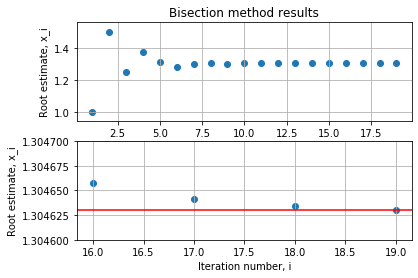

In [3]:
# Plot bisection method results

plt.subplot(2,1,1)
plt.title('Bisection method results')
plt.scatter(bisec_iter_list,bisec_value_list)
axes = plt.gca()
axes.set_ylabel('Root estimate, x_i')
plt.grid()
plt.subplot(2,1,2)
plt.scatter(bisec_iter_list[-4:],bisec_value_list[-4:])
plt.axhline(y=1.30463,color='r')
axes = plt.gca()
axes.set_ylim([1.3046,1.3047])
axes.set_ylabel('Root estimate, x_i')
axes.set_xlabel('Iteration number, i')
axes.ticklabel_format(useOffset=False)
plt.grid()


Let's now examine the Newton-Raphson Method. We will again use the **Scarborough criterion** as the stopping condition, computing it in the beginning of our code and then calculating the approximate error of each iteration. We will stop the calculation once the approximate error is below the error given by the Scarborough formula. For the Newton-Raphson Method, we also have to calculate the derivative of the function. Let's assume:

$$
\begin{aligned}
&f(x)=e^{x} - 2x\cos(x)-3 \\
\end{aligned}
$$

the derivative of $f(x)$ is:

$$
\begin{aligned}
&f'(x)=e^{x} - 2x\cos(x)+2x\sin(x) \\
\end{aligned}
$$

In [4]:
# Newton-Raphson method

x0 = 1
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))
ea = 100
repetitions = 0
x_prev = x0

newton_iter_list = []
newton_value_list = []

f = lambda x : math.exp(x)-(2*x*math.cos(x))-3
fdot = lambda x : math.exp(x)+2*(x*math.sin(x)-math.cos(x))

while ea>es:
    x_next = x_prev - (f(x_prev)/fdot(x_prev))
    ea = math.fabs((x_next-x_prev)*100/x_next)
    repetitions = repetitions + 1
    x_prev = x_next
    newton_iter_list.append(repetitions)
    newton_value_list.append(x_next)
    
print('Root found (after %d iterations)! x_root = %.5f' % (repetitions, x_next))

Root found (after 5 iterations)! x_root = 1.30463


Let's again plot the results to see how the method approaches the desired accuracy:

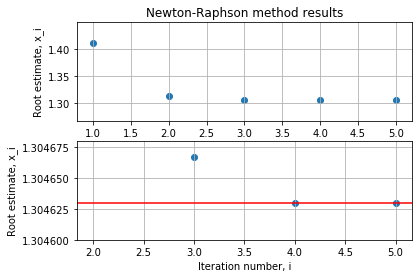

In [5]:
# Plot Newton-Raphson method results

plt.subplot(2,1,1)
plt.title('Newton-Raphson method results')
plt.scatter(newton_iter_list,newton_value_list)
axes = plt.gca()
axes.set_ylabel('Root estimate, x_i')
plt.grid()
plt.subplot(2,1,2)
plt.scatter(newton_iter_list[-4:],newton_value_list[-4:])
plt.axhline(y=1.30463,color='r')
axes = plt.gca()
axes.set_ylim([1.3046,1.30468])
axes.set_ylabel('Root estimate, x_i')
axes.set_xlabel('Iteration number, i')
axes.ticklabel_format(useOffset=False)
plt.grid()

Looking at the results we can assume that the Newton-Raphson Method performs better the bisection method used above. However, let's not forget that we used assumed a value of $x_{0}=1$ for the Newton-Raphson method, while we used the entire interval values $x_{lower}=0$ and $x_{upper}=2$ for the bisection method. It would be interesting to see if there are worse case scenarios for the Newton-Raphson method, for which we wouuld have to perform more iterations.

We can re-run the Newton-Raphson method starting from $x_{0}=1$ moving up towards to $x_{0}=2$ with a step of $step=0.1$. For each step we will ask for the number of iterations to achieve the requested accuracy, in order to ultimately obtain the maximum possible number of iterations for this scenario. We will also provide the minimum amount of iterations needed (although this is not a "fair" comparison).

In [6]:
# Newton-Raphson method (step increasing - max/min_iterations finder)

x_lower = 0
x_upper = 2
step_size = 0.1
max_iterations = 0
min_iterations = 100
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))

f = lambda x : math.exp(x)-(2*x*math.cos(x))-3
fdot = lambda x : math.exp(x)+2*(x*math.sin(x)-math.cos(x))

for i in np.arange(x_lower, x_upper, step_size):
    repetitions = 0
    x_prev = i
    ea = 100
    while ea>es:
        repetitions = repetitions + 1
        x_next = x_prev - (f(x_prev)/fdot(x_prev))
        ea = math.fabs((x_next-x_prev)*100/x_next)
        x_prev = x_next
    if repetitions > max_iterations:
        max_iterations = repetitions
        max_iterations_initial = i
    elif repetitions < min_iterations:
        min_iterations = repetitions
        min_iterations_initial = i
        
print('Max iterations needed to find root is for initial value x_0 = %.2f (%d iterations)!' % (max_iterations_initial, max_iterations))
print('Min iterations needed to find root is for initial value x_0 = %.2f (%d iterations)!' % (min_iterations_initial, min_iterations))

Max iterations needed to find root is for initial value x_0 = 0.00 (14 iterations)!
Min iterations needed to find root is for initial value x_0 = 1.30 (3 iterations)!


Based on this result it is evident that for this specific example, the **Newton-Raphson** method outperforms the bi-section method, with the worst case scenario requiring 4 less iterations than the bisection method to achieve the requested accuracy. 

## Solution for (b)

$$
\begin{aligned}
(b) &\;\; x^{2} + \sin(x)+e^{x}-2=0, \; x\in (0,1)
\end{aligned}
$$

In a similar manner, let's begin with the bisection method and plot the results:

In [7]:
# Bi-section method

x_lower = 0
x_upper = 1
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))
ea = 100
repetitions = 0
value_prev = 100

f = lambda x : pow(x,2)+math.sin(x)+math.exp(x)-2

while ea>es:
    xr = (x_lower+x_upper)/2
    repetitions = repetitions + 1
    if f(x_lower)*f(xr)<0:
        x_upper = xr
        value = xr
    elif f(x_upper)*f(xr)<0:
        x_lower = xr
        value = xr
    ea = math.fabs((value-value_prev)*100/value)
    value_prev = xr
    
print('Root found (after %d iterations)! x_root = %.5f' % (repetitions, xr))

Root found (after 19 iterations)! x_root = 0.38708


To use the Newton-Raphson method, we have again to calculate the derivative. Let's assume:

$$
\begin{aligned}
f(x)=x^{2}+ \sin(x) + e^{x} -2
\end{aligned}
$$

then the derivative of $f(x)$ is:

$$
\begin{aligned}
f'(x)=2x+\cos(x)+e^{x}
\end{aligned}
$$

And let's also assume that we start from the middle of the interval $(0,1)$, and therefore we have $x_{0}=0.5$. To make the comparison "fair" again, we will also determine maximum possible amount of iterations needed if we start from any value inside $(0,1)$ with a $step=0.1$.

In [8]:
# Newton-Raphson method

x0 = 0.5
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))
ea = 100
repetitions = 0
x_prev = x0

f = lambda x : pow(x,2)+math.sin(x)+math.exp(x)-2
fdot = lambda x : (2*x)+math.cos(x)+math.exp(x)

while ea>es:
    x_next = x_prev - (f(x_prev)/fdot(x_prev))
    ea = math.fabs((x_next-x_prev)*100/x_next)
    repetitions = repetitions + 1
    x_prev = x_next
    
print('Root found (after %d iterations)! x_root = %.5f' % (repetitions, x_next))

Root found (after 4 iterations)! x_root = 0.38708


In [9]:
# Newton-Raphson method (step increasing - max/min_iterations finder)

x_lower = 0
x_upper = 2
step_size = 0.1
max_iterations = 0
min_iterations = 100
n = 5 # Number of significant digits to be computed
es = 0.5*pow(10, (2-n))

f = lambda x : pow(x,2)+math.sin(x)+math.exp(x)-2
fdot = lambda x : (2*x)+math.cos(x)+math.exp(x)

for i in np.arange(x_lower, x_upper, step_size):
    repetitions = 0
    x_prev = i
    ea = 100
    while ea>es:
        repetitions = repetitions + 1
        x_next = x_prev - (f(x_prev)/fdot(x_prev))
        ea = math.fabs((x_next-x_prev)*100/x_next)
        x_prev = x_next
    if repetitions > max_iterations:
        max_iterations = repetitions
        max_iterations_initial = i
    elif repetitions < min_iterations:
        min_iterations = repetitions
        min_iterations_initial = i
        
print('Max iterations needed to find root is for initial value x_0 = %.2f (%d iterations)!' % (max_iterations_initial, max_iterations))
print('Min iterations needed to find root is for initial value x_0 = %.2f (%d iterations)!' % (min_iterations_initial, min_iterations))

Max iterations needed to find root is for initial value x_0 = 1.70 (6 iterations)!
Min iterations needed to find root is for initial value x_0 = 0.40 (3 iterations)!


## Conclusion

For both functions used in (a) and (b), we can clearly see that the Newton-Raphson method outperforms the bisection method.